
# Mini-Proyecto de **Regresión** — Base con TODOs (Fish Market)
**Objetivo:** Predecir el **peso** (`Weight`) de los peces a partir de dimensiones físicas.

**Dataset:** *Fish Market* (público).  
URL sugerida: `https://raw.githubusercontent.com/selva86/datasets/master/Fish.csv`

**Modelos a usar (regresión):**
- **KNNRegressor**
- **SVR**
- **DecisionTreeRegressor**
- **RandomForestRegressor**

> ⚠️ Qué debes completar (TODOs):
> 1) **Train/Test split** y **normalización estándar** (cuando aplique).  
> 2) **GridSearchCV** para cada modelo (4), **predicciones** y **métricas** (MSE, MAE, RMSE, MAPE, R²).  
> 3) **Comparativa final** de modelos.
>
> Debajo de cada bloque tienes una **SOLUCIÓN comentada** (`# SOLUCIÓN`) que luego puedes borrar.



## 1) Imports y configuración


In [20]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, 
                             mean_absolute_percentage_error, root_mean_squared_error)

# Modelos de regresión (los 4 pedidos)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")


In [21]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, 
                             mean_absolute_percentage_error, root_mean_squared_error)

# Modelos de regresión (los 4 pedidos)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")



## 2) Carga de datos


In [22]:
url = "https://raw.githubusercontent.com/Ankit152/Fish-Market/refs/heads/main/Fish.csv"
df = pd.read_csv(url)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340



## 3) EDA mínima


In [23]:
print("Shape:", df.shape)
print("\nTipos:\n", df.dtypes)
print("\nNulos por columna:\n", df.isna().sum())
display(df.describe().T)

print("\nClases de 'Species':")
print(df['Species'].value_counts())

Shape: (159, 7)

Tipos:
 Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

Nulos por columna:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142



Clases de 'Species':
Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64



## 4) Selección de variables
- **y (target):** `Weight`
- **X (features):** `Length1`, `Length2`, `Length3`, `Height`, `Width`  
(Dejamos fuera `Species` para centrarnos en un flujo de regresión con numéricas.)


In [24]:
target = "Weight"
features = ["Length1", "Length2", "Length3", "Height", "Width"]

X = df[features].copy()
y = df[target].copy()

X.head(), y.head()

(   Length1  Length2  Length3   Height   Width
 0     23.2     25.4     30.0  11.5200  4.0200
 1     24.0     26.3     31.2  12.4800  4.3056
 2     23.9     26.5     31.1  12.3778  4.6961
 3     26.3     29.0     33.5  12.7300  4.4555
 4     26.5     29.0     34.0  12.4440  5.1340,
 0    242.0
 1    290.0
 2    340.0
 3    363.0
 4    430.0
 Name: Weight, dtype: float64)


## 5) **TODO** — Train/Test split + Normalización
1. Divide en train/test (por ejemplo `test_size=0.2`, `random_state=42`).  
2. Aplica **StandardScaler** ajustando SOLO con `X_train` y transformando `X_train` y `X_test`.

> ℹ️ **Nota:** KNN y SVR requieren **escalado** para funcionar bien. Para **DT** y **RF**, usaremos los datos **sin escalar**.


In [25]:

# =============
# TODO: Split
# =============
# X_train, X_test, y_train, y_test = ...

# =============
# TODO: Escalado
# ==============


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train/Test shapes (sin escalar):", X_train.shape, X_test.shape)
print("Train/Test shapes (escalado):", X_train_scaled.shape, X_test_scaled.shape)



Train/Test shapes (sin escalar): (127, 5) (32, 5)
Train/Test shapes (escalado): (127, 5) (32, 5)


## PREGUNTAS PARA RESPONDER:

1. Aparte del StandardScaler, ¿qué otros tipos de escalado conoces?
2. Que diferencias hay entre ellos?
3. ¿Por qué es importante ajustar el escalador solo con los datos de entrenamiento? 
4. Para que sirve la semilla aleatoria? 

### RESPUESTA
1. A parte del StandardScaler, también se conocen otros tipos de escalado como son MinMaxScaler, Normalizer y RobustScaler

2. El "StandardScaler" escala por estandarización, esto es, convierte los datos a una distribución de media 0 y varianza 1. El "MinMaxScaler" escala los datos a un rango entre 0 y 1 y los normaliza. 
Por otra parte, "RobustScaler" utiliza medianas y rangos intercuartílicos, lo que hace este método menos sensible a outliers. Finalmente, "Normalizer" transforma las muestras individuales a su forma unitaria.

3. Si también se usa la información de los datos, se contamina la evaluación (esto se comoce como fuga de datos o data leakage). Utilizar estos datos haría que el rendimiento parezca mejor de lo que es ya
que se ha dado la posibilidad de que el modelo vea los patrosnes de los tests de antemano.

4. La semilla aleatoria o "random_state" garantiza y proporciona reproducibilidad. Lo logra estableciendo el punto de origen del generador de números aleatorios,
asegurando que cada vez que se reproduzca el código se logre la misma separación de datos entre entrenamiento y prueba.


## 6) Utilidad para métricas (MSE, MAE, RMSE, MAPE, R²)


In [26]:

def regression_metrics(y_true, y_pred):
    """
    TODO prepara una funcion que calcule las metricas de regresion:
    MAE, MSE, RMSE, MAPE, R2 
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape, "R2": r2}


### MAS PREGUNTAS PARA RESPONDER:
1. Que aporta cada metrica?
2. Cual es la mas importante?

### RESPUESTA

1. 

* MAE (Mean Absolute Error): indica en promedio cuánto se equivoca el modelo en sus predicciones, expresado en las mismas unidades que la variable objetivo.

* El MSE (Mean Squared Error): eleva al cuadrado las discrepancias, de tal manera que los errores significativos tienen un mayor peso. Esto lo vuelve más sensible a outliers.

* El RMSE (Root Mean Squared Error): es la raíz del MSE y restablece el error a las mismas unidades que la variable de interés. Es la métrica más empleada.

* El MAPE (Mean Absolute Percentage Error): presenta el error en términos de porcentaje en relación al valor real, lo que lo vuelve bastante fácil de entender. Puede verse distorsionado si hay valores muy bajos.

* El R² (Coeficiente de determinación): cuantifica la fracción de la variabilidad de los datos que el modelo explica. Un R^2 próximo a 1 sugiere que el modelo entiende bien las relaciones, en cambio, valores bajos indican que explica poco

2. 
No se podría afirmar con seguridad que una de estas métricas sea más importante que las demás. Sin embargo, las más empleadas suelen ser la RMSE ya que es intuitiva y refleja de manera clara el error. Por otra parte, R^2 también es muy usada para conocer la varianza de los datos con los que se estña trabajando y saber así la fiabilidad de los datos.


## 7) Entrenamiento de modelos
Iremos acumulando resultados en una lista `results` para la comparativa final.


In [27]:

results = []



## 7) KNNRegressor

https://www.ibm.com/es-es/think/topics/knn

Instancia proporcionada. **Completa**: GridSearchCV (parrilla típica), `fit`, `predict`, métricas y guarda en `results` para comparar al final.


In [28]:

# =====================
# Instanciación del modelo
# =====================
model = KNeighborsRegressor()

# =====================
# TODO: GridSearchCV
# =====================

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]   # 1 = Manhattan, 2 = Euclídea
}

gsearch = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gsearch.fit(X_train_scaled, y_train)

# =====================
# TODO: Predicción y métricas
# =====================

y_pred = gsearch.predict(X_test_scaled)
mets = regression_metrics(y_test, y_pred)

print("KNNRegressor ->", mets)

best_knnregressor = gsearch.best_estimator_ 

results.append({"modelo": "KNNRegressor", **mets}) # guardamos los resultados de las metricas por si queremos comparar


KNNRegressor -> {'MAE': 29.097914845221382, 'MSE': 1944.8657615436455, 'RMSE': 44.10063221251647, 'MAPE': 0.08832478705564789, 'R2': 0.9863268032003921}


### MAS PREGUNTAS PARA RESPONDER:
1. ¿Que hiperparametros son los más importantes en KNNRegressor?
2. Dice el profe que este modelo realmente no tiene un entrenamiento como tal, ¿a qué se refiere?
3. ¿que otras distancias aparte de la euclidea conoces? ¿porque pueden ser interesantes?

### RESPUESTA

1, 3.

En KNNRegressor, los parámetros de especial interés son:
* K(n_neighbors): Indica los vecinos a tener en cuenta para la medición.
* Weights: Decide si todos los vecinos pesan igual o si tienen más peso los más cercanos.
* P (cercanía entre puntos):  Podemos distinguir entre los siguientes:
    - Distancia euclídea (p=2)
    - Distancia de  Manhattan (p=1)
    - Distancia de Minkowski (esta medida de distancia es la forma generalizada de las métricas de distancia euclidianas y de Manhattan)
    - Distancia de Hamming (esta técnica se utiliza normalmente con vectores booleanos o de cadena, para identificar los puntos en los que los vectores no coinciden)

2.

Decimos que no tiene entrenamiento ya que KNN es un algoritmo no paramétrico, es decir, guarda datos en la memoria. Sabemos así que los algoritmos paramétricos son aquellos que sí tienen entrenamiento.


## 7) SVR

https://www.ibm.com/es-es/think/topics/support-vector-machine

Instancia proporcionada. **Completa**: GridSearchCV (parrilla típica), `fit`, `predict`, métricas y guarda en `results` para comparar al final.


In [29]:

# =====================
# Instanciación del modelo
# =====================
model = SVR()

# =====================
# TODO: GridSearchCV
# =====================

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

gsearch = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gsearch.fit(X_train_scaled, y_train)

# =====================
# TODO: Predicción y métricas
# =====================

y_pred = gsearch.predict(X_test_scaled)
mets = regression_metrics(y_test, y_pred)

print("SVR ->", mets)

best_svr = gsearch.best_estimator_  # guardamos el mejor modelo

results.append({"modelo": "SVR", **mets})

SVR -> {'MAE': 109.8436525280757, 'MSE': 22161.967765513327, 'RMSE': 148.86896172645703, 'MAPE': 4.486678196005525, 'R2': 0.844192358816622}


### PREGUNTAS PARA RESPONDER:
1. ¿Qué papel juega el parámetro `C` en SVR?
2. ¿Y el parámetro `epsilon`?
3. ¿Qué diferencias hay entre los kernels `linear`, `poly` y `rbf`?

### RESPUESTA

1. 

C supervisa la penalización de errores. Si es grande, el modelo se adapta mejor a los datos (menor margen de error, posibilidad de sobreajuste). Si es reducido, se concede un mayor margen de error, lo que favorece la generalización.

2. 

Establece un margen alrededor de la predicción donde los errores no se consideran. A mayor valor de epsilon, el modelo se vuelve más flexible, ya que admite más variaciones sin sufrir penalizaciones.

3. 

* Lineal: divide con hiperplanos rectos, tiene baja complejidad, es útil cuando la relación es aproximadamente lineal, es rápido y fácil de interpretar.

* Polinómica: divide utilizando curvas polinómicas (con grado ajustable), tiene una complejidad media-alta y es útil para relaciones curvilíneas que son estructuradas. Presenta un nuevo parámetro denominado 'degree', que representa el grado del polinomio.

* Rbf (Función de Base Radial): divide con áreas complejas y versátiles, posee alta complejidad, es eficaz para patrones complejos (no lineales) y es altamente adaptable


## 7) DecisionTreeRegressor

https://www.ibm.com/es-es/think/topics/decision-trees

Instancia proporcionada. **Completa**: GridSearchCV (parrilla típica), `fit`, `predict`, métricas y guarda en `results` para comparar al final.

In [30]:

# =====================
# Instanciación del modelo
# =====================
model = DecisionTreeRegressor(random_state=42)

# =====================
# TODO: GridSearchCV
# =====================

param_grid = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gsearch = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gsearch.fit(X_train, y_train)


# =====================
# TODO: Predicción y métricas
# =====================
print("DecisionTreeRegressor ->", mets)

best_dt = gsearch.best_estimator_  # guardamos el mejor modelo

results.append({"modelo": "DecisionTreeRegressor", **mets})


DecisionTreeRegressor -> {'MAE': 109.8436525280757, 'MSE': 22161.967765513327, 'RMSE': 148.86896172645703, 'MAPE': 4.486678196005525, 'R2': 0.844192358816622}


### PREGUNTAS PARA RESPONDER:
1.- El profe dice que los árboles no necesitan escalado, ¿por qué?

2.- ¿Qué papel juega el parámetro `max_depth`?

### RESPUESTA 

1. 

Los árboles no necesitan escalador dado que estos no dependen de magnitudes absolutas. Estos simplemente eligen puntos de corte en cada variable sin tener en cuenta las unidades de las mismas.

2. 

"max_depth" representa el límite máximo de profundidad. Cuanto mayor sea este parámetro, más capaz es el árbol de ajustar los datos pero aumenta la complejidad y dificulta la generalización. Cuando "max_depth" es más pequeño, ocurre lo contrario.

## 7) RandomForestRegressor

https://www.ibm.com/es-es/think/topics/random-forest

Instancia proporcionada. **Completa**: GridSearchCV (parrilla típica), `fit`, `predict`, métricas y guarda en `results` para comparar al final.

In [31]:

# =====================
# Instanciación del modelo
# =====================
model = RandomForestRegressor(random_state=42)

# =====================
# TODO: GridSearchCV
# =====================
# PISTA de param_grid:
# # {'n_estimators': ..., 'max_depth': ..., 'min_samples_split': ...}  # ejemplo

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

gsearch = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gsearch.fit(X_train, y_train)

# =====================
# TODO: Predicción y métricas
# =====================

y_pred = gsearch.predict(X_test)
mets = regression_metrics(y_test, y_pred)

print("RandomForestRegressor ->", mets)

best_rf = gsearch.best_estimator_  # guardamos el mejor modelo

results.append({"modelo": "RandomForestRegressor", **mets})

KeyboardInterrupt: 

### PREGUNTAS PARA RESPONDER:
1. ¿por que 100 o 200 o 500 arboles son mejor que 1?
2. ¿Qué condicion deben cumplir los arboles para que el conjunto funcione bien?

### Respuesta 

1. 

Cuantos más árboles ee tengan en cuenta, más se puede minimizar el error en las mediciones. Esto se debe a que se compensan las variaciones individuales.

2. 

Deben ser lo suficientemente variados. Esto se consigue capacitándolos con diversas muestras de datos y eligiendo subconjuntos de variables en cada separación. De esta manera se impide que todos adquieran el mismo conocimiento



## 8) **TODO** — Comparativa final
Ordena por **RMSE** (menor es mejor) y/o muestra todas las métricas.


In [ ]:

# =============
# TODO: Comparativa
# =============
import pandas as pd

df_res = pd.DataFrame(results).sort_values(by="RMSE", ascending=True)
display(df_res)


,modelo,MAE,MSE,RMSE,MAPE,R2
0,KNNRegressor,29.097915,1944.865762,44.100632,0.088325,0.986327
3,RandomForestRegressor,46.417291,4612.498588,67.915378,0.131442,0.967572
1,SVR,109.843653,22161.967766,148.868962,4.486678,0.844192
2,DecisionTreeRegressor,109.843653,22161.967766,148.868962,4.486678,0.844192


## 9) Comenta la jugada

1) Hablame de que significa cada metrica, que historia cuenta cada metrica en conjunto, como comparan unas metricas con otras.
2) Que modelo es mejor y por qué. 
3) Que otras coonsideraciones podriamos tener en cuenta a la hora de elegir el modelo mas alla de las metricas.
4) Que info util nos ofrecen los modelos entrenados. 

### RESPUESTA

1. 

El MAE evalúa el error promedio en valor absoluto. El MSE incrementa los errores al cuadrado, castigando más los errores significativos. El RMSE es la raíz cuadrada del MSE, presentada en las mismas unidades que la variable objetivo. El MAPE indica el error en porcentaje, resultando intuitivo aunque sensible a valores bajos. El R² evalúa qué parte de la variabilidad de los datos es explicada por el modelo

2. 

El más adecuado varía según las métricas comparadas, pero en términos generales, Random Forest generalmente sobresale debido a su rendimiento, robustez y habilidad para generalizar. Sin embargo, si se valora la interpretabilidad, un árbol simple puede ser más adecuado.

3. 

El tiempo de procesamiento, la claridad al explicar el modelo, la capacidad de escalar a grandes volúmenes de datos y la sensibilidad a valores atípicos son aspectos fundamentales para seleccionar en un contexto real

4. 

Aparte de prever, pueden ofrecer indicios sobre qué variables son más significativas, cómo se organizan las relaciones en los datos e incluso identificar patrones ocultos que facilitan una mejor comprensión del problema




## 10) Extensiones
- Añadir `Species` con One-Hot Encoding y comparar.
- Que columnas podriamos crear/eliminar... feature engineering?
- Sabrias dibujar un decission tree?



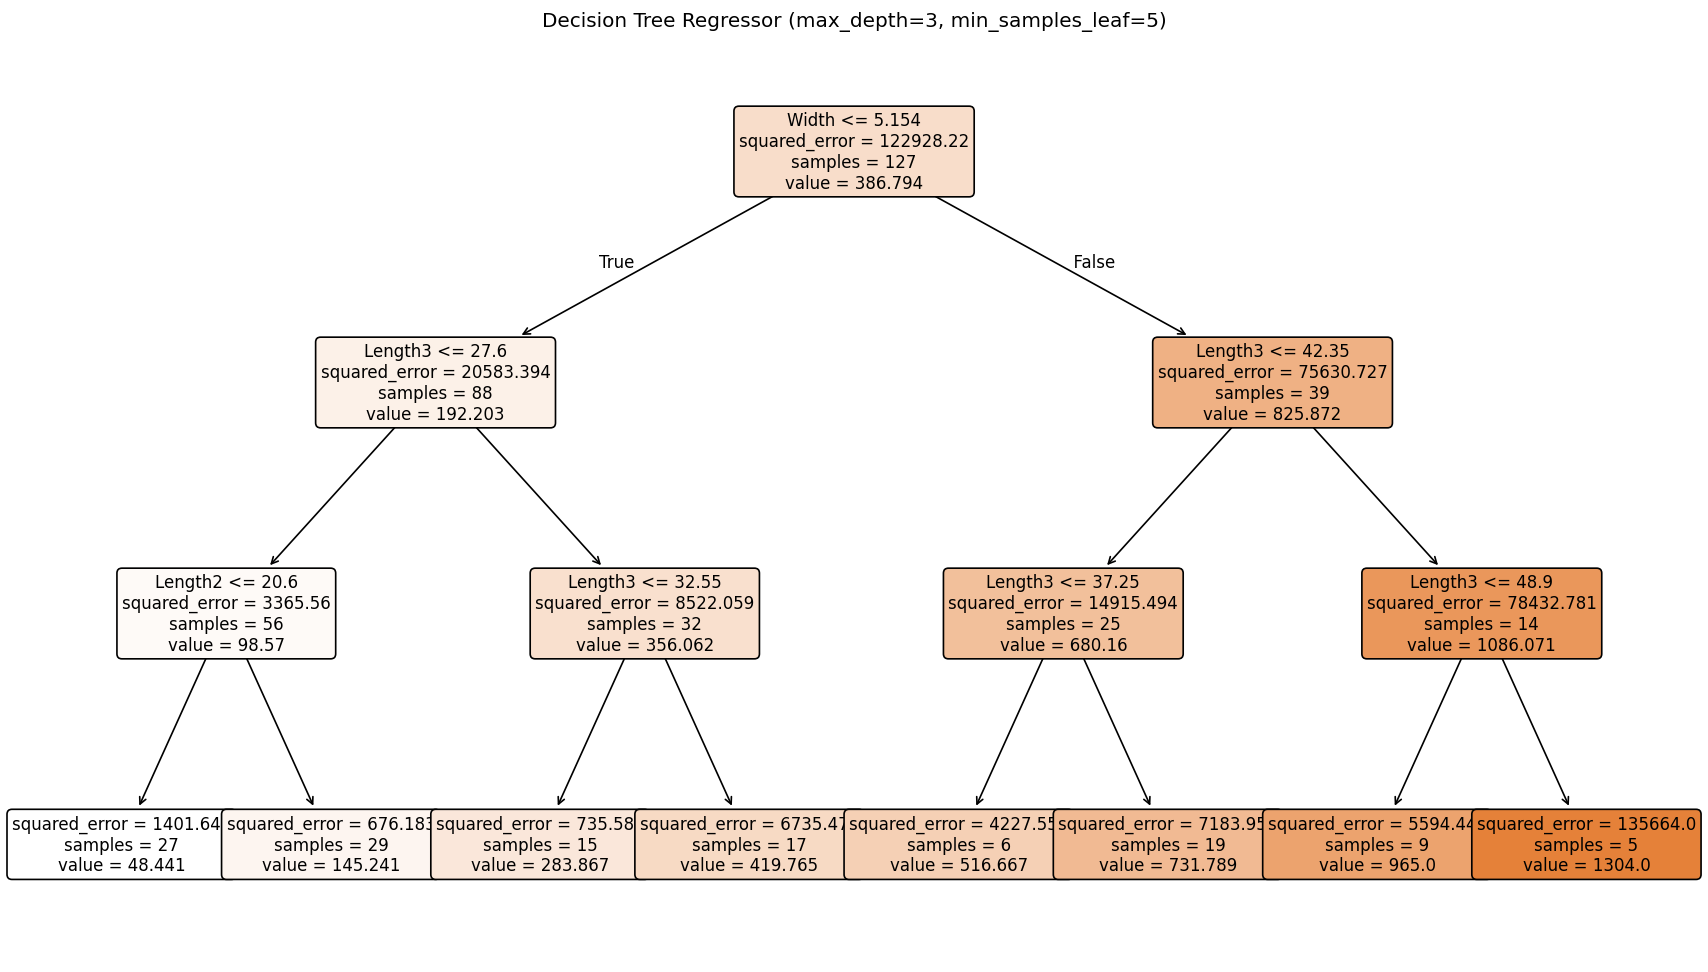

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42)
dt.fit(X_train, y_train)
plt.figure(figsize=(18, 10), dpi=120)
plot_tree(
   dt,
   feature_names=features,
   filled=True,          # colorea por valor
   rounded=True,         # nodos con bordes redondeados
   fontsize=10
)
plt.title("Decision Tree Regressor (max_depth=3, min_samples_leaf=5)")
plt.show()


Shape: (159, 7)

Tipos:
 Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

Nulos por columna:
 Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142



Clases de 'Species':
Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64
Train/Test shapes (sin escalar): (127, 5) (32, 5)
Train/Test shapes (escalado): (127, 5) (32, 5)
KNNRegressor -> {'MAE': 29.097914845221382, 'MSE': 1944.8657615436455, 'RMSE': 44.10063221251647, 'MAPE': 0.08832478705564789, 'R2': 0.9863268032003921}
SVR -> {'MAE': 109.8436525280757, 'MSE': 22161.967765513327, 'RMSE': 148.86896172645703, 'MAPE': 4.486678196005525, 'R2': 0.844192358816622}
DecisionTreeRegressor -> {'MAE': 109.8436525280757, 'MSE': 22161.967765513327, 'RMSE': 148.86896172645703, 'MAPE': 4.486678196005525, 'R2': 0.844192358816622}
RandomForestRegressor -> {'MAE': 46.417290751730874, 'MSE': 4612.498587737419, 'RMSE': 67.91537813880903, 'MAPE': 0.1314423179323526, 'R2': 0.967572260165663}


,modelo,MAE,MSE,RMSE,MAPE,R2
0,KNNRegressor,29.097915,1944.865762,44.100632,0.088325,0.986327
3,RandomForestRegressor,46.417291,4612.498588,67.915378,0.131442,0.967572
1,SVR,109.843653,22161.967766,148.868962,4.486678,0.844192
2,DecisionTreeRegressor,109.843653,22161.967766,148.868962,4.486678,0.844192


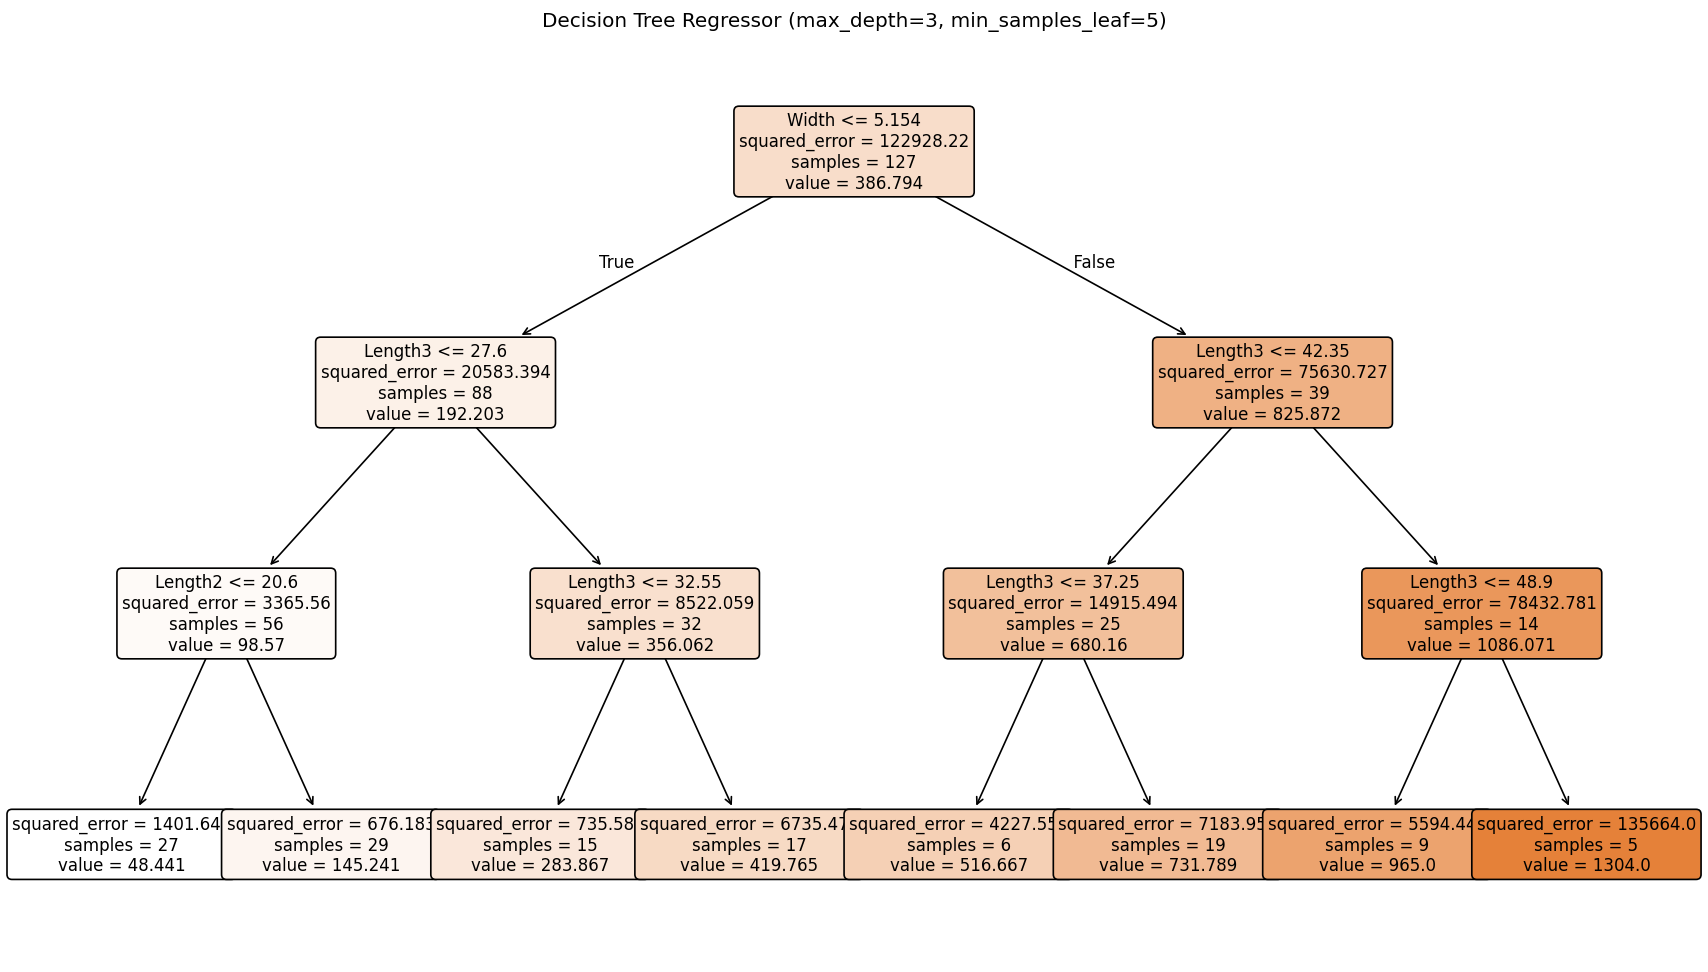

In [ ]:
#CÓDIGO COMPLETO

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, 
                             mean_absolute_percentage_error, root_mean_squared_error)

# Modelos de regresión (los 4 pedidos)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

#Carga de datos
url = "https://raw.githubusercontent.com/Ankit152/Fish-Market/refs/heads/main/Fish.csv"
df = pd.read_csv(url)
df.head()

#EDA mínima
print("Shape:", df.shape)
print("\nTipos:\n", df.dtypes)
print("\nNulos por columna:\n", df.isna().sum())
display(df.describe().T)

print("\nClases de 'Species':")
print(df['Species'].value_counts())

#Selección de datos
target = "Weight"
features = ["Length1", "Length2", "Length3", "Height", "Width"]

X = df[features].copy()
y = df[target].copy()

X.head(), y.head()

#Train/test split + normalización
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train/Test shapes (sin escalar):", X_train.shape, X_test.shape)
print("Train/Test shapes (escalado):", X_train_scaled.shape, X_test_scaled.shape)

#Utilidad para métricas
def regression_metrics(y_true, y_pred):
    """
    TODO prepara una funcion que calcule las metricas de regresion:
    MAE, MSE, RMSE, MAPE, R2 
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape, "R2": r2}

#Entrenamiento de moldes (creación de una lista)
results = []

#KNN regressor
model = KNeighborsRegressor()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]   # 1 = Manhattan, 2 = Euclídea
}

gsearch = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gsearch.fit(X_train_scaled, y_train)

y_pred = gsearch.predict(X_test_scaled)
mets = regression_metrics(y_test, y_pred)

print("KNNRegressor ->", mets)

best_knnregressor = gsearch.best_estimator_ 

results.append({"modelo": "KNNRegressor", **mets}) # guardamos los resultados de las metricas por si queremos comparar

#SVR
model = SVR()

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

gsearch = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gsearch.fit(X_train_scaled, y_train)

y_pred = gsearch.predict(X_test_scaled)
mets = regression_metrics(y_test, y_pred)

print("SVR ->", mets)

best_svr = gsearch.best_estimator_  # guardamos el mejor modelo

results.append({"modelo": "SVR", **mets})

#Decision tree regressor
model = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gsearch = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gsearch.fit(X_train, y_train)


print("DecisionTreeRegressor ->", mets)

best_dt = gsearch.best_estimator_  # guardamos el mejor modelo

results.append({"modelo": "DecisionTreeRegressor", **mets})

#Randorm forest regression
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

gsearch = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

gsearch.fit(X_train, y_train)

y_pred = gsearch.predict(X_test)
mets = regression_metrics(y_test, y_pred)

print("RandomForestRegressor ->", mets)

best_rf = gsearch.best_estimator_  # guardamos el mejor modelo

results.append({"modelo": "RandomForestRegressor", **mets})

#Completar
df_res = pd.DataFrame(results).sort_values(by="RMSE", ascending=True)
display(df_res)

#Gràfico
from sklearn.tree import DecisionTreeRegressor, plot_tree
dt = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5, random_state=42)
dt.fit(X_train, y_train)
plt.figure(figsize=(18, 10), dpi=120)
plot_tree(
   dt,
   feature_names=features,
   filled=True,          # colorea por valor
   rounded=True,         # nodos con bordes redondeados
   fontsize=10
)
plt.title("Decision Tree Regressor (max_depth=3, min_samples_leaf=5)")
plt.show()

